# Week 6 Code Explanation
Importing libraries

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

# Graph Construction and Visualization from CSV Data

This code segment focuses on importing node and edge data from CSV files, constructing a directed graph using the networkx library, and visualizing it. Key steps include reading CSV files to obtain graph components, building the graph, counting its nodes for a basic size overview, and employing a circular layout for visualization. This process is vital for network analysis, offering insights into the structural relationships within the graph.

The number of nodes in the graph is DiGraph with 82 nodes and 162 edges.


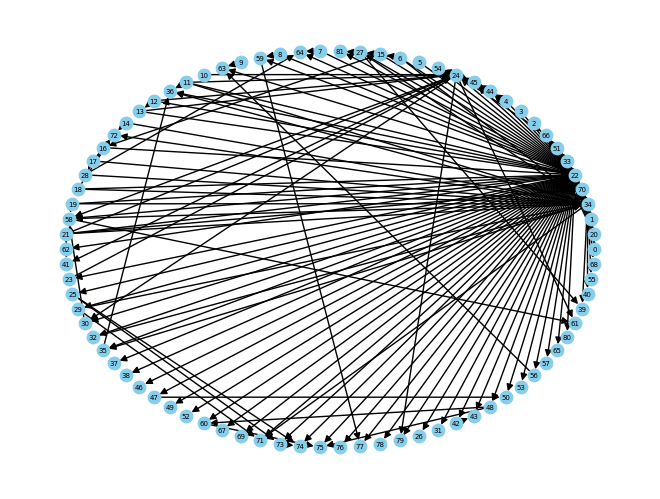

In [11]:
#IMPORTING DATABASE
edges_filename = "edges.csv"
nodes_filename = "nodes.csv"

df_edges = pd.read_csv(edges_filename)
df_nodes = pd.read_csv(nodes_filename)

# Create the graph using the edges CSV
G = nx.from_pandas_edgelist(df_edges, '# source', ' target', create_using=nx.DiGraph())

# Number of nodes
N = G.number_of_nodes()
print('The number of nodes in the graph is
 ' + str(G) + '.')

# Circular plot
nx.draw_circular(G, with_labels="True",node_color='skyblue', edge_color='black', node_size=80, font_size=5, arrows=True)

# Refining an Undirected Graph and Isolating its Largest Component

This code segment converts a directed graph to undirected, removes self-loops, and then isolates its largest connected component. By focusing on this principal component, the code enables targeted analysis of the most interconnected part of the network, providing valuable insights into its core structure and relationships.







In [12]:
# Convert G to an undirected graph
G_undirected = G.to_undirected()

# Remove self-loops
G_undirected.remove_edges_from(nx.selfloop_edges(G_undirected))

# Identify the largest connected component
largest_cc = max(nx.connected_components(G_undirected), key=len)

# Create a subgraph of G_undirected with only the nodes in the largest connected component
G_largest_cc = G_undirected.subgraph(largest_cc).copy()

# Community Detection in Graphs Using Various Techniques

This code demonstrates three community detection methods on a graph: Bridge Removal, Modularity Optimization (Louvain Method), and Label Propagation. Each method aims to identify distinct communities within the graph by analyzing its structure. The code first applies bridge removal, identifying communities by iteratively removing edges with high betweenness centrality. It then uses the Louvain method for modularity optimization, a popular approach for detecting community structures. Finally, the label propagation technique is employed, using a simple yet effective method for community detection. The results include the community partitions and their respective modularities, offering insights into the graph's community structure. This analysis is crucial for understanding the complex interrelations in networks.

In [13]:
import community as community_louvain

def modularity_optimization(graph):
    partition = community_louvain.best_partition(graph)
    modularity = community_louvain.modularity(partition, graph)
    return partition, modularity
# Assuming G_largest_cc is the undirected graph to be used for community detection.
# We'll implement three community detection techniques.

# Bridge Removal
def bridge_removal(graph):
    # Make a copy of the graph
    G = graph.copy()
    # While the graph is connected
    while nx.is_connected(G):
        # Compute the edge betweenness
        bridges = list(nx.edge_betweenness_centrality(G).items())
        # Remove the edge with the highest betweenness
        bridge = max(bridges, key=lambda x: x[1])[0]
        G.remove_edge(*bridge)
    # The graph is no longer connected, so we have our communities
    # Now compute the modularity of the resulting partition
    communities = list(nx.connected_components(G))
    modularity = nx.algorithms.community.modularity(graph, communities)
    return communities, modularity

# Modularity Optimization (Louvain method)
def modularity_optimization(graph):
    import community as community_louvain
    partition = community_louvain.best_partition(graph)
    modularity = community_louvain.modularity(partition, graph)
    return partition, modularity

# Label Propagation
def label_propagation(graph):
    communities = list(nx.algorithms.community.label_propagation_communities(graph))
    modularity = nx.algorithms.community.modularity(graph, communities)
    return communities, modularity

# Now, we'll apply these methods to our mock graph G_largest_cc
bridge_communities, bridge_modularity = bridge_removal(G_largest_cc)
louvain_partition, louvain_modularity = modularity_optimization(G_largest_cc)
label_communities, label_modularity = label_propagation(G_largest_cc)

# Output the results
bridge_communities, bridge_modularity, louvain_partition, louvain_modularity, label_communities, label_modularity


([{0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   57,
   58,
   59,
   60,
   61,
   62,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81},
  {9, 56, 63}],
 0.024005486968449886,
 {0: 2,
  20: 2,
  1: 2,
  34: 2,
  70: 2,
  22: 0,
  33: 2,
  51: 2,
  66: 2,
  2: 0,
  3: 0,
  4: 3,
  44: 3,
  45: 3,
  24: 3,
  54: 3,
  5: 0,
  6: 4,
  15: 4,
  27: 4,
  81: 4,
  7: 5,
  64: 5,
  8: 0,
  59: 0,
  9: 1,
  63: 1,
  10: 3,
  11: 2,
  36: 2,
  12: 3,
  13: 3,
  14: 5,
  72: 5,
  16: 4,
  17: 5,
  28: 5,
  18: 5,
  19: 3,
  58: 3,
  21: 3,
  62: 3,
  41: 3,
  23: 3,
  25: 0,
  29: 2,
  30: 3,
  3

# Comparative Analysis of Community Detection Methods in Network Graphs

This code performs a comparative analysis of three community detection methods (Bridge Removal, Louvain Modularity Optimization, and Label Propagation) on a network graph. It involves timing each method, computing community structures and their modularities, and evaluating cluster size distributions. The results are organized into DataFrames for each method, providing a clear comparison of the number of clusters, cluster sizes, computational time, and modularity scores. This structured approach allows for an in-depth evaluation of the efficiency and effectiveness of each community detection technique, offering valuable insights for network analysis.

In [14]:
import time
import pandas as pd
import networkx as nx
from collections import defaultdict

# Assuming G_largest_cc is already defined and is the graph you are working with.

# Function to invert the Louvain partition dictionary
def invert_partition(partition_dict):
    community_to_nodes = defaultdict(list)
    for node, community in partition_dict.items():
        community_to_nodes[community].append(node)
    return community_to_nodes

# Function to get cluster size distribution
def cluster_size_distribution(communities):
    return [len(c) for c in communities]

# Bridge Removal Method
start_time = time.time()
bridge_communities, bridge_modularity = bridge_removal(G_largest_cc)
bridge_time = time.time() - start_time
bridge_cluster_sizes = cluster_size_distribution(bridge_communities)

# DataFrame for Bridge Removal Method
df_bridge = pd.DataFrame([{
    'Method': 'Bridge Removal',
    'Num Clusters': len(bridge_communities),
    'Cluster Size Distribution': bridge_cluster_sizes,
    'Computational Time': bridge_time,
    'Modularity': bridge_modularity
}])

# Modularity Optimization Method (Louvain)
start_time = time.time()
louvain_partition, louvain_modularity = modularity_optimization(G_largest_cc)
louvain_time = time.time() - start_time
louvain_communities = invert_partition(louvain_partition)
louvain_cluster_sizes = cluster_size_distribution(louvain_communities.values())

# DataFrame for Modularity Optimization Method (Louvain)
df_louvain = pd.DataFrame([{
    'Method': 'Modularity Optimization (Louvain)',
    'Num Clusters': len(louvain_communities),
    'Cluster Size Distribution': louvain_cluster_sizes,
    'Computational Time': louvain_time,
    'Modularity': louvain_modularity
}])

# Label Propagation Method
start_time = time.time()
label_communities, label_modularity = label_propagation(G_largest_cc)
label_time = time.time() - start_time
label_cluster_sizes = cluster_size_distribution(label_communities)

# DataFrame for Label Propagation Method
df_label = pd.DataFrame([{
    'Method': 'Label Propagation',
    'Num Clusters': len(label_communities),
    'Cluster Size Distribution': label_cluster_sizes,
    'Computational Time': label_time,
    'Modularity': label_modularity
}])

# Concatenate all DataFrames
comparison_results = pd.concat([df_bridge, df_louvain, df_label], ignore_index=True)

# Display the DataFrame
comparison_results




,Method,Num Clusters,Cluster Size Distribution,Computational Time,Modularity
0,Bridge Removal,2,"[79, 3]",0.026443,0.024005
1,Modularity Optimization (Louvain),6,"[7, 15, 34, 17, 6, 3]",0.002634,0.432080
2,Label Propagation,2,"[5, 77]",0.001054,0.083829



1. **Modularity**:
   - This is a measure of the strength of the division of a network into clusters. Networks with high modularity have dense connections between the nodes within modules but sparse connections between nodes in different modules.
   - The Louvain method has produced a partition with the highest modularity, indicating it has effectively identified a strong community structure.

2. **Number of Clusters**:
   - The Louvain method has found more clusters than the other two methods. This could mean it is better at identifying nuanced community structures within the network.

3. **Cluster Size Distribution**:
   - The distribution of cluster sizes can give you insight into the network's structure. The bridge removal method results in one very large cluster and one very small, which might not be as useful if you're looking for a finer-grained community structure.
   - The Louvain method provides a more balanced size distribution, which may be more representative of the actual community structures in the network.

4. **Computational Time**:
   - While label propagation was the fastest, the Louvain method was not significantly slower and provided much better modularity.
   - The computational time for bridge removal was the longest, which might be a disadvantage if you're working with larger networks.

Based on these observations, the **Louvain method** appears to be the best choice for your network. It has produced a higher modularity, indicating a strong community structure, and a reasonable number of clusters with a balanced size distribution, all within a moderate computational time.

When you write up your interpretation, you should discuss these points and any additional observations you have based on your knowledge of the network. If you have specific expectations or hypotheses about the network's community structure, you should compare your results to those expectations.

You might also want to consider the implications of the cluster sizes and distributions. For instance, are smaller communities more significant in your network, or are you looking for a few large, overarching communities?

Remember, the best method is context-dependent. If you're looking for a quick, broad overview of the community structure, label propagation might be sufficient. But if you need a more detailed and accurate partitioning, the Louvain method is preferable despite taking slightly longer.

# Visualizing Community Structure in a Network Grap

This code visualizes the community structure of a network graph identified through the Louvain method. It assigns unique colors to each community and displays the graph with these colors. The layout used is spring_layout, but can be substituted with any other. Edges are drawn with partial transparency for clarity, while nodes are colored according to their community membership, enhancing the visual distinction between different communities. This visualization is essential for intuitively understanding the community structures within the network, making complex interrelations more accessible and interpretable.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


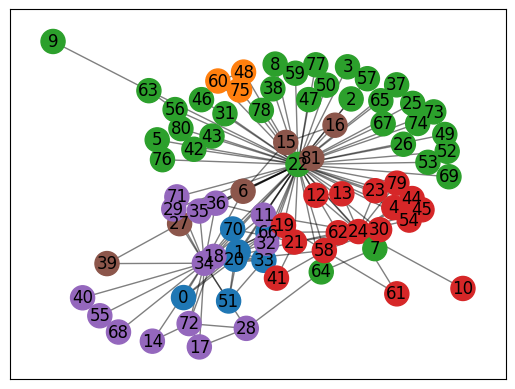

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming G_largest_cc is your graph and louvain_partition contains the community info
# where each node's community is indicated by a corresponding integer

# Create a color map based on the communities
community_colors = {node: 'C' + str(louvain_partition[node]) for node in G_largest_cc.nodes()}

# Draw the graph
pos = nx.spring_layout(G_largest_cc)  # or any other layout you prefer
nx.draw_networkx_edges(G_largest_cc, pos, alpha=0.5)
nx.draw_networkx_nodes(G_largest_cc, pos, node_color=list(community_colors.values()), cmap=plt.cm.jet)
nx.draw_networkx_labels(G_largest_cc, pos)

plt.show()


#  Integrating Community Data into Graph and Exporting for Visualization

This code enhances a network graph by adding community information to each node and then exports the graph to a GEXF file for further analysis or visualization, typically in Gephi. It iterates through the nodes of G_largest_cc, assigning community labels from the louvain_partition. The final step involves writing the graph to a GEXF file, a standard format compatible with many graph analysis tools. This process is crucial for transferring complex network data into visual analysis software, facilitating deeper exploration and presentation of the community structures within the network.







In [23]:
# Assuming 'G_largest_cc' is your graph and 'louvain_partition' contains the community info
for node in G_largest_cc.nodes():
    G_largest_cc.nodes[node]['community'] = louvain_partition[node]

# Now write the graph to a GEXF file with the correct extension
nx.write_gexf(G_largest_cc, "gephi_project.gexf")



# Comparing Community Detection Methods Using Normalized Mutual Information

This code compares different community detection methods (Bridge Removal, Louvain, and Label Propagation) using Normalized Mutual Information (NMI). It first converts community data into a consistent format, then calculates the NMI between each pair of community detection methods. NMI is a statistical measure used to assess the similarity between two partitions, making it a valuable tool for evaluating the effectiveness and agreement of different community detection approaches. This comparison is crucial in network analysis to understand the consistency and reliability of community detection algorithms.







In [22]:
from sklearn.metrics import normalized_mutual_info_score

# Assuming 'louvain_partition', 'bridge_communities', and 'label_communities' are defined

# Convert communities to a list where the index is the node and the value is the community
def partition_to_list(partition):
    return [partition[node] for node in sorted(partition)]

# Convert communities detected by bridge removal and label propagation to match the format
bridge_list = partition_to_list({node: i for i, comp in enumerate(bridge_communities) for node in comp})
label_list = partition_to_list({node: i for i, comp in enumerate(label_communities) for node in comp})

# Louvain communities are already in the correct format
louvain_list = partition_to_list(louvain_partition)

# Now compute NMI between each pair of partitions
nmi_bridge_louvain = normalized_mutual_info_score(bridge_list, louvain_list)
nmi_bridge_label = normalized_mutual_info_score(bridge_list, label_list)
nmi_label_louvain = normalized_mutual_info_score(label_list, louvain_list)

# Output the results
nmi_bridge_louvain, nmi_bridge_label, nmi_label_louvain


(0.03948555568667399, 0.012138812860413382, 0.20361044518867905)